<a href="https://colab.research.google.com/github/Zardian18/Mnist-CNN/blob/master/Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mnist Dataset

Identifying handwritten digits using CNN

## 1. Importing the data

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.datasets import mnist


In [7]:
import tensorflow as tf
import os


In [8]:
data_dir = "mnist_dataset"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")


In [9]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [10]:
for images, labels, folder in [(train_images, train_labels, train_dir), (test_images, test_labels, test_dir)]:
    for i, (image, label) in enumerate(zip(images, labels)):
        label_dir = os.path.join(folder, str(label))
        os.makedirs(label_dir, exist_ok=True)

        image = tf.expand_dims(image, axis=-1)  # Add channel dimension
        image_filename = os.path.join(label_dir, f"{i}.png")
        tf.keras.utils.save_img(image_filename, image)


In [11]:
!ls mnist_dataset/train/0

10005.png  17828.png  25701.png  33578.png  41288.png  48963.png  56469.png
1000.png   17838.png  25707.png  33608.png  41291.png  489.png	  5646.png
10010.png  17871.png  25714.png  33640.png  41296.png  49011.png  56489.png
10022.png  17877.png  25725.png  33641.png  41315.png  49013.png  56509.png
10025.png  17881.png  25729.png  33645.png  41318.png  49014.png  56512.png
10026.png  17905.png  25743.png  33647.png  41320.png  49027.png  56522.png
10045.png  17923.png  25750.png  33657.png  41331.png  49059.png  56530.png
10069.png  17930.png  25754.png  33661.png  41338.png  49065.png  56533.png
10071.png  17932.png  25755.png  33665.png  41341.png  4906.png   56556.png
10080.png  17941.png  25757.png  33669.png  41350.png  49075.png  56570.png
10083.png  17956.png  25773.png  33670.png  41352.png  49085.png  56573.png
10107.png  17968.png  25783.png  33673.png  41353.png  49086.png  56606.png
10119.png  1796.png   25803.png  33677.png  41357.png  49097.png  56608.png
10120.png  179

In [12]:
for dirpath, dirname, filename in os.walk("mnist_dataset"):
  print(f"There are {len(dirname)} directories and {len(filename)} images in '{dirpath}'. ")

There are 2 directories and 0 images in 'mnist_dataset'. 
There are 10 directories and 0 images in 'mnist_dataset/test'. 
There are 0 directories and 1135 images in 'mnist_dataset/test/1'. 
There are 0 directories and 892 images in 'mnist_dataset/test/5'. 
There are 0 directories and 1028 images in 'mnist_dataset/test/7'. 
There are 0 directories and 1032 images in 'mnist_dataset/test/2'. 
There are 0 directories and 958 images in 'mnist_dataset/test/6'. 
There are 0 directories and 1010 images in 'mnist_dataset/test/3'. 
There are 0 directories and 1009 images in 'mnist_dataset/test/9'. 
There are 0 directories and 974 images in 'mnist_dataset/test/8'. 
There are 0 directories and 982 images in 'mnist_dataset/test/4'. 
There are 0 directories and 980 images in 'mnist_dataset/test/0'. 
There are 10 directories and 0 images in 'mnist_dataset/train'. 
There are 0 directories and 6742 images in 'mnist_dataset/train/1'. 
There are 0 directories and 5421 images in 'mnist_dataset/train/5'. 


In [13]:
import pathlib
import numpy as np
data_dir=pathlib.Path("mnist_dataset/train")
class_names= np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [14]:
class_names

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

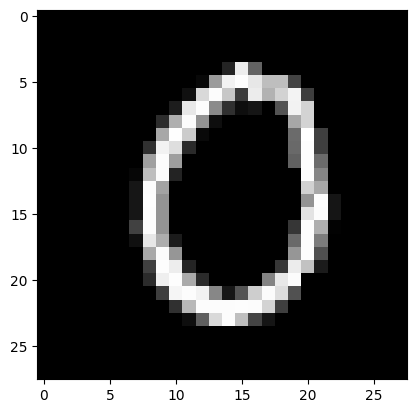

In [15]:
img=plt.imread("mnist_dataset/train/0/15864.png")
plt.imshow(img, cmap="gray")

In [16]:
import random

def view_random_image(target_dir, target_class):
  target_folder=target_dir+"/"+ target_class
  random_img= random.sample(os.listdir(target_folder),1)
  img_path= target_folder+"/"+random_img[0]

  img=plt.imread(img_path)
  plt.imshow(img, cmap='gray')
  plt.axis(False)
  plt.title(f'Class: {target_class}')
  print(img.shape)
  print(f'image num: {img_path}')

  return img

In [17]:
train_dir="mnist_dataset/train"
test_dir="mnist_dataset/test"

## 2. Visualize the data

(28, 28)
image num: mnist_dataset/train/7/45258.png


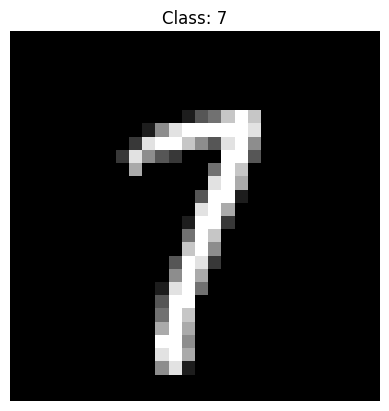

In [18]:
img=view_random_image(train_dir, '7')

## 2. Preprocessing the data

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2
                                           )

In [20]:
train_data= train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(28,28),
                                              class_mode="categorical")
train_data_aug=train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                           target_size=(28,28),
                                                           class_mode="categorical")

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(28,28),
                                           class_mode="categorical")

Found 60000 images belonging to 10 classes.
Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [21]:
len(train_data)

1875

## 3. Modelling the data (baseline model)

In [23]:
model1= tf.keras.Sequential()
model1.add(tf.keras.layers.Conv2D(10,3,activation="relu", input_shape=(28,28,3)))
model1.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model1.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(len(class_names), activation="softmax"))

model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history1=model1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
1875/1875 [==============================] - 57s 25ms/step - loss: 0.1651 - accuracy: 0.9499 - val_loss: 0.0721 - val_accuracy: 0.9775
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0643 - accuracy: 0.9804 - val_loss: 0.0574 - val_accuracy: 0.9820
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0436 - val_accuracy: 0.9865
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0498 - val_accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0580 - val_accuracy: 0.9832


In [24]:
import pandas as pd
def plot_history(history):
  loss=history.history["loss"]
  accuracy=history.history["accuracy"]
  val_loss=history.history["val_loss"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history['loss']))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="validation_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="validation_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")

  plt.legend();

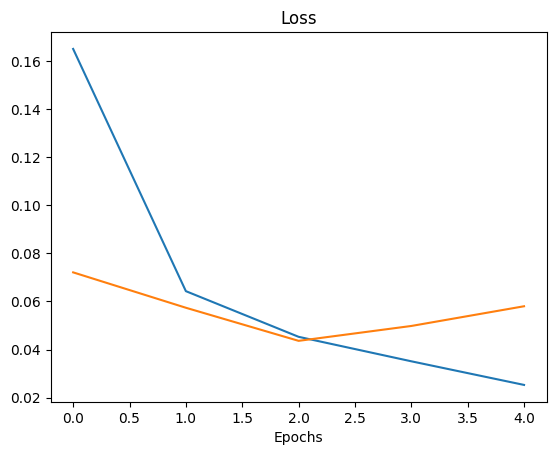

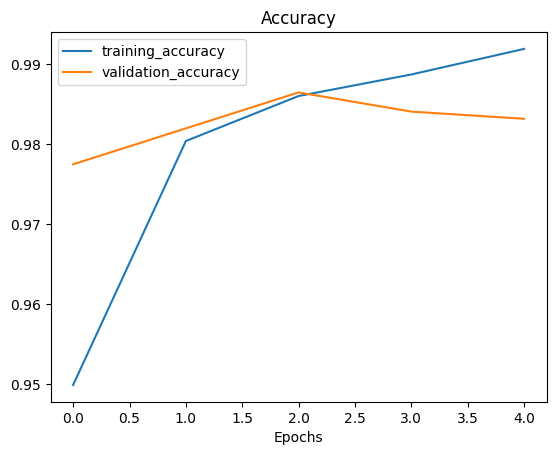

In [26]:
plot_history(history1)

We can imporve model by using augmented data so that the loss do not increases and accuracy does not decreases for the validation set

## 5. Improving the model

In [27]:
model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(10,3,activation="relu", input_shape=(28,28,3)))
model2.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model2.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(len(class_names), activation="softmax"))

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history2a=model2.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

history2b= model2.fit(train_data_aug,
                      epochs=5,
                      steps_per_epoch=len(train_data_aug),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
1875/1875 [==============================] - 44s 22ms/step - loss: 0.1448 - accuracy: 0.9571 - val_loss: 0.0584 - val_accuracy: 0.9805
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0555 - accuracy: 0.9830 - val_loss: 0.0450 - val_accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0515 - val_accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0446 - val_accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0449 - val_accuracy: 0.9865
Epoch 1/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.4389 - accuracy: 0.8677 - val_loss: 0.1047 - val_accuracy: 0.9678
Epoch 2/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2281 - accuracy: 0.9311 - val_loss: 0.1000 - val_ac

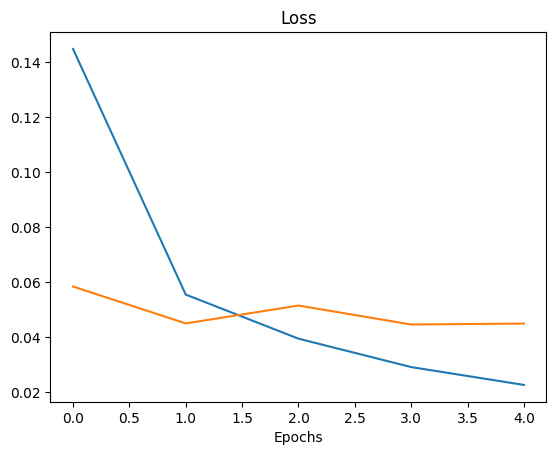

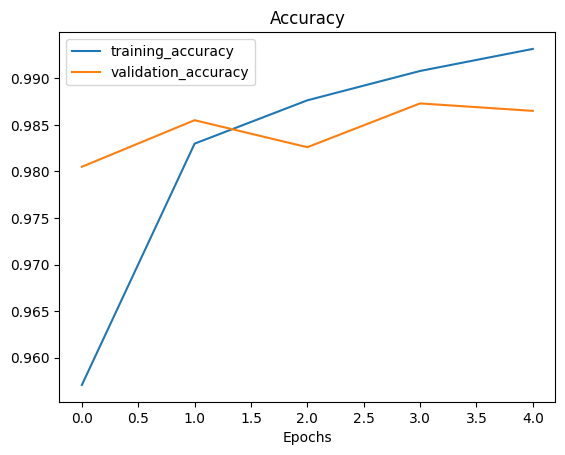

In [28]:
plot_history(history2a)

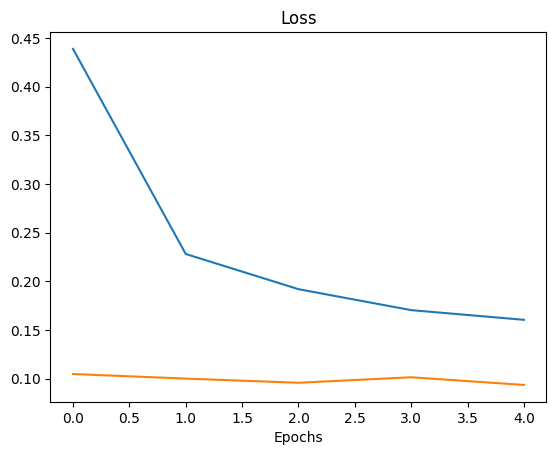

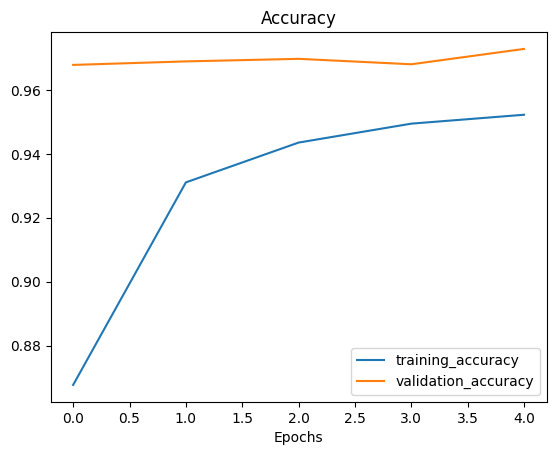

In [29]:
plot_history(history2b)

Training on augmented data is yeilding lesser accuracy, this is because the image rotation and zoom is sabotaging the model training

In [30]:
model3=tf.keras.Sequential()
model3.add(tf.keras.layers.Conv2D(10,3,activation="relu", input_shape=(28,28,3)))
model3.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model3.add(tf.keras.layers.MaxPool2D())
model3.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model3.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model3.add(tf.keras.layers.MaxPool2D())
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(len(class_names), activation="softmax"))

model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history3=model3.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/10
1875/1875 [==============================] - 38s 19ms/step - loss: 0.2324 - accuracy: 0.9257 - val_loss: 0.0784 - val_accuracy: 0.9741
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0795 - accuracy: 0.9758 - val_loss: 0.0557 - val_accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0621 - accuracy: 0.9813 - val_loss: 0.0425 - val_accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0512 - val_accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0445 - accuracy: 0.9867 - val_loss: 0.0379 - val_accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0402 - accuracy: 0.9878 - val_loss: 0.0332 - val_accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0363 -

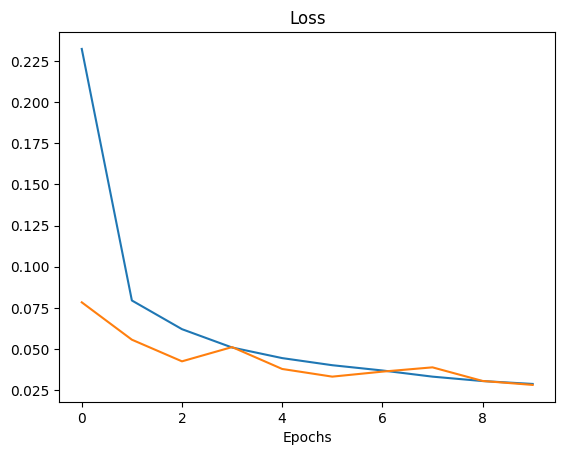

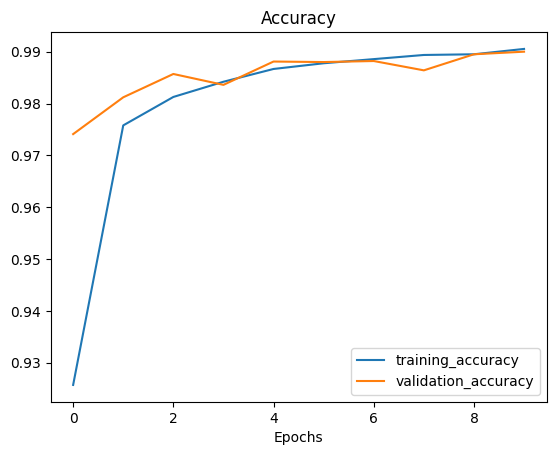

In [31]:
plot_history(history3)

This model has 99% accuracy both in training and validation set

## Predicting on custom images

In [53]:
def preprocess_img(filename, img_shape=28):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img, size=[img_shape,img_shape])
  img=img/255.
  return img

(-0.5, 1431.5, 871.5, -0.5)

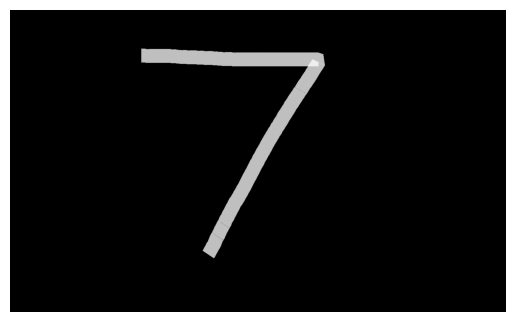

In [57]:
img= mpimg.imread("7.png")
plt.imshow(img)
plt.axis(False)

In [65]:
img=preprocess_img("7.png")
img.shape

TensorShape([28, 28, 3])

In [59]:
expanded_img=tf.expand_dims(img, axis=0)
expanded_img

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype

In [60]:
class_names[model3.predict(expanded_img).argmax()]

1/1 [==============================] - 0s 23ms/step


'7'

Let's predict on one more image

In [61]:
img=preprocess_img("3.png")

(-0.5, 1431.5, 871.5, -0.5)

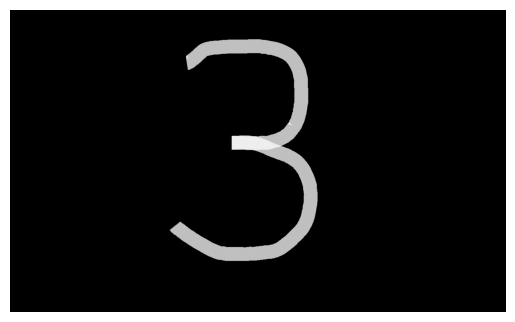

In [64]:
img= mpimg.imread("3.png")
plt.imshow(img)
plt.axis(False)

In [62]:
expanded_img=tf.expand_dims(img, axis=0)
expanded_img

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype

In [63]:
class_names[model3.predict(expanded_img).argmax()]

1/1 [==============================] - 0s 20ms/step


'3'